In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./df_분리/전용면적_85초과.csv')
df.drop('건물면적(㎡)',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

## 건물면적(㎡) 컬럼 제거
만약 주택 가격을 예측하는 모델이 주택 면적 열을 기준으로 데이터를 분리한다면, 주택 면적 열을 제외해야 할까요?

모델을 구축할 때 주택 면적 열을 기준으로 데이터를 분리하는 것은 일반적인 접근 방식입니다. 이는 동일한 면적 범위 내에서 주택 가격을 비교하고 예측하기 위함입니다. 따라서, 주택 면적 열은 모델에 포함되지 않아야 할 것입니다.

만약 주택 면적 열을 모델에 포함한다면, 이는 모델이 이미 면적에 대한 정보를 가지고 있다고 가정하는 것입니다. 이는 모델이 주택 가격을 예측하는 데에 있어서 실제 데이터에 대한 일반화(generalization) 능력을 감소시킬 수 있습니다. 따라서, 주택 면적 열은 모델에서 제외하는 것이 좋습니다.

주택 가격을 예측하는 모델에서는 다른 독립 변수들을 사용하여 주택 가격과의 관계를 모델링해야 합니다. 주택 면적 열은 독립 변수 중 하나일 수 있지만, 모든 독립 변수들을 고려하여 종속 변수인 주택 가격과의 관계를 분석하는 것이 중요합니다. 이를 통해 보다 정확하고 신뢰할 수 있는 주택 가격 예측 모델을 구축할 수 있습니다.

# OLS - Scaling 후

## R_OLS_1

In [2]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87499
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:27:16                                         
No. Iterations:                    24                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4308      0.023    236.082      0.000       5.386       5.476
층                     0.3758      0.007     53.337      0.000       0.362       0.390
KOSPI종가              -0.0862      0.018     -4.910      0.000      -0.121      -0.052
Fed기준금리              -0.1922      0.010    -19.683      0.000      -0.211      -0.173
국제유가(Dubai)($/배럴)     0.1567      0.010     15.718      0.000       0.137       0.176
부동산거래량               -0.0149      0.005     -2.766      0.006      -0.025      -0.004
국고채5년(평균)            -0.6725      0.053    -12.647      0.000      -0.777      -0.568
국고채10년(평균)            0.5378      0.038     14.139      0.000       0.463       0.612
회사채3년(평균)             0.1811      0.015     11.724      0.000       0.151       0.211
CD91물(평균)            -0.0899      0.023     -3.887      0.000      -0.135      -0.045
BOK기준금리              -0.0843      0.019     -4.490      0.000      -0.121      -0.048
건물연식                  0.1509      0.004     39.452      0.000       0.143       0.158
GDP대비가계부채비율          -0.2259      0.017    -13.522      0.000      -0.259      -0.193
환율종가                 -0.0564      0.008     -6.668      0.000      -0.073      -0.040
선행지수순환변동치             0.2022      0.012     16.184      0.000       0.178       0.227
EPU                   0.0036      0.005      0.686      0.492      -0.007       0.014
장단기금리spread          -0.2642      0.024    -11.111      0.000      -0.311      -0.218
금값종가                 -0.1510      0.016     -9.530      0.000      -0.182      -0.120
LTV                  -0.4764      0.006    -85.145      0.000      -0.487      -0.465
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### EPU 컬럼 삭제

In [3]:
X_scaled.drop('EPU', axis=1, inplace=True)

## R_OLS_2

In [4]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87500
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:27:46                                         
No. Iterations:                    24                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4343      0.022    242.032      0.000       5.390       5.478
층                     0.3757      0.007     53.330      0.000       0.362       0.390
KOSPI종가              -0.0872      0.017     -4.988      0.000      -0.121      -0.053
Fed기준금리              -0.1931      0.010    -19.917      0.000      -0.212      -0.174
국제유가(Dubai)($/배럴)     0.1584      0.010     16.286      0.000       0.139       0.177
부동산거래량               -0.0159      0.005     -3.082      0.002      -0.026      -0.006
국고채5년(평균)            -0.6649      0.052    -12.795      0.000      -0.767      -0.563
국고채10년(평균)            0.5352      0.038     14.155      0.000       0.461       0.609
회사채3년(평균)             0.1781      0.015     11.967      0.000       0.149       0.207
CD91물(평균)            -0.0919      0.023     -4.005      0.000      -0.137      -0.047
BOK기준금리              -0.0861      0.019     -4.634      0.000      -0.123      -0.050
건물연식                  0.1508      0.004     39.446      0.000       0.143       0.158
GDP대비가계부채비율          -0.2248      0.017    -13.515      0.000      -0.257      -0.192
환율종가                 -0.0548      0.008     -6.738      0.000      -0.071      -0.039
선행지수순환변동치             0.2016      0.012     16.168      0.000       0.177       0.226
장단기금리spread          -0.2662      0.024    -11.272      0.000      -0.312      -0.220
금값종가                 -0.1521      0.016     -9.645      0.000      -0.183      -0.121
LTV                  -0.4764      0.006    -85.156      0.000      -0.487      -0.465
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## R_VIF_2

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [6]:
# R_VIF_2
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      4.291249                  층
1    164.466042            KOSPI종가
2     49.758997            Fed기준금리
3     65.861449  국제유가(Dubai)($/배럴)
4      9.679435             부동산거래량
5   1235.392870          국고채5년(평균)
6    850.618945         국고채10년(평균)
7    123.710894          회사채3년(평균)
8    280.216497          CD91물(평균)
9    258.715842            BOK기준금리
10     5.282136               건물연식
11   105.939397        GDP대비가계부채비율
12    22.812740               환율종가
13   126.051974          선행지수순환변동치
14   220.305796        장단기금리spread
15    60.458377               금값종가
16    26.446927                LTV


### 국고채5년(평균) 컬럼 삭제

In [7]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## R_OLS_3

In [8]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87501
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:28:33                                         
No. Iterations:                    38                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5632      0.020    277.847      0.000       5.524       5.602
층                     0.3761      0.007     53.319      0.000       0.362       0.390
KOSPI종가              -0.0933      0.017     -5.335      0.000      -0.128      -0.059
Fed기준금리              -0.2242      0.009    -23.890      0.000      -0.243      -0.206
국제유가(Dubai)($/배럴)     0.1491      0.010     15.405      0.000       0.130       0.168
부동산거래량               -0.0076      0.005     -1.484      0.138      -0.018       0.002
국고채10년(평균)            0.1494      0.023      6.543      0.000       0.105       0.194
회사채3년(평균)             0.1281      0.014      8.920      0.000       0.100       0.156
CD91물(평균)            -0.2113      0.021    -10.009      0.000      -0.253      -0.170
BOK기준금리              -0.1861      0.017    -11.011      0.000      -0.219      -0.153
건물연식                  0.1525      0.004     39.863      0.000       0.145       0.160
GDP대비가계부채비율          -0.1741      0.016    -10.853      0.000      -0.206      -0.143
환율종가                 -0.0201      0.008     -2.590      0.010      -0.035      -0.005
선행지수순환변동치             0.2222      0.012     17.965      0.000       0.198       0.246
장단기금리spread          -0.4700      0.018    -26.856      0.000      -0.504      -0.436
금값종가                 -0.1951      0.015    -12.702      0.000      -0.225      -0.165
LTV                  -0.4647      0.006    -83.988      0.000      -0.476      -0.454
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 부동산거래량 컬럼 삭제

In [9]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

## R_OLS_4

In [10]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87502
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:28:51                                         
No. Iterations:                    34                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5649      0.020    278.057      0.000       5.526       5.604
층                     0.3761      0.007     53.334      0.000       0.362       0.390
KOSPI종가              -0.1006      0.017     -5.956      0.000      -0.134      -0.067
Fed기준금리              -0.2238      0.009    -23.872      0.000      -0.242      -0.205
국제유가(Dubai)($/배럴)     0.1478      0.010     15.362      0.000       0.129       0.167
국고채10년(평균)            0.1541      0.023      6.800      0.000       0.110       0.199
회사채3년(평균)             0.1321      0.014      9.353      0.000       0.104       0.160
CD91물(평균)            -0.2155      0.021    -10.287      0.000      -0.257      -0.174
BOK기준금리              -0.1824      0.017    -10.939      0.000      -0.215      -0.150
건물연식                  0.1526      0.004     39.917      0.000       0.145       0.160
GDP대비가계부채비율          -0.1764      0.016    -11.039      0.000      -0.208      -0.145
환율종가                 -0.0208      0.008     -2.693      0.007      -0.036      -0.006
선행지수순환변동치             0.2259      0.012     18.605      0.000       0.202       0.250
장단기금리spread          -0.4782      0.017    -28.493      0.000      -0.511      -0.445
금값종가                 -0.1926      0.015    -12.623      0.000      -0.222      -0.163
LTV                  -0.4665      0.005    -85.658      0.000      -0.477      -0.456
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_4

In [11]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.279657                  층
1   150.607768            KOSPI종가
2    43.883574            Fed기준금리
3    64.880804  국제유가(Dubai)($/배럴)
4   253.479320         국고채10년(평균)
5   111.332387          회사채3년(평균)
6   268.499245          CD91물(평균)
7   229.679923            BOK기준금리
8     5.247110               건물연식
9    88.356010        GDP대비가계부채비율
10   15.576161               환율종가
11  117.216898          선행지수순환변동치
12  136.393360        장단기금리spread
13   58.818982               금값종가
14   21.302886                LTV


### 국고채10년(평균) 컬럼 삭제

In [12]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## R_OLS_5

In [13]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87503
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:29:47                                         
No. Iterations:                    24                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5063      0.018    304.383      0.000       5.471       5.542
층                     0.3766      0.007     53.385      0.000       0.363       0.390
KOSPI종가              -0.0992      0.017     -5.869      0.000      -0.132      -0.066
Fed기준금리              -0.2208      0.009    -23.587      0.000      -0.239      -0.202
국제유가(Dubai)($/배럴)     0.1475      0.010     15.323      0.000       0.129       0.166
회사채3년(평균)             0.1981      0.010     19.221      0.000       0.178       0.218
CD91물(평균)            -0.1304      0.017     -7.753      0.000      -0.163      -0.097
BOK기준금리              -0.1941      0.017    -11.709      0.000      -0.227      -0.162
건물연식                  0.1528      0.004     39.941      0.000       0.145       0.160
GDP대비가계부채비율          -0.1745      0.016    -10.911      0.000      -0.206      -0.143
환율종가                 -0.0096      0.008     -1.274      0.203      -0.024       0.005
선행지수순환변동치             0.2739      0.010     27.339      0.000       0.254       0.294
장단기금리spread          -0.4357      0.016    -28.088      0.000      -0.466      -0.405
금값종가                 -0.2046      0.015    -13.486      0.000      -0.234      -0.175
LTV                  -0.4634      0.005    -85.441      0.000      -0.474      -0.453
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 환율종가 컬럼 삭제

In [14]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## R_OLS_6

In [15]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87504
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:30:41                                         
No. Iterations:                    26                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4939      0.015    364.908      0.000       5.464       5.523
층                     0.3767      0.007     53.390      0.000       0.363       0.390
KOSPI종가              -0.0923      0.016     -5.776      0.000      -0.124      -0.061
Fed기준금리              -0.2235      0.009    -24.449      0.000      -0.241      -0.206
국제유가(Dubai)($/배럴)     0.1521      0.009     17.017      0.000       0.135       0.170
회사채3년(평균)             0.1969      0.010     19.191      0.000       0.177       0.217
CD91물(평균)            -0.1292      0.017     -7.699      0.000      -0.162      -0.096
BOK기준금리              -0.1916      0.016    -11.644      0.000      -0.224      -0.159
건물연식                  0.1528      0.004     39.931      0.000       0.145       0.160
GDP대비가계부채비율          -0.1770      0.016    -11.151      0.000      -0.208      -0.146
선행지수순환변동치             0.2756      0.010     27.673      0.000       0.256       0.295
장단기금리spread          -0.4350      0.015    -28.069      0.000      -0.465      -0.405
금값종가                 -0.2007      0.015    -13.546      0.000      -0.230      -0.172
LTV                  -0.4631      0.005    -85.547      0.000      -0.474      -0.453
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_6

In [16]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.247309                  층
1   143.446904            KOSPI종가
2    42.047758            Fed기준금리
3    54.303493  국제유가(Dubai)($/배럴)
4    38.936507          회사채3년(평균)
5   197.343545          CD91물(평균)
6   212.593958            BOK기준금리
7     5.204442               건물연식
8    68.848998        GDP대비가계부채비율
9    76.024027          선행지수순환변동치
10  121.531325        장단기금리spread
11   55.393779               금값종가
12   18.285259                LTV


### BOK기준금리 컬럼 삭제

In [17]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## R_OLS_7

In [18]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87505
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:31:44                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4357      0.014    382.428      0.000       5.408       5.464
층                     0.3779      0.007     53.521      0.000       0.364       0.392
KOSPI종가              -0.1245      0.016     -7.919      0.000      -0.155      -0.094
Fed기준금리              -0.2497      0.009    -28.149      0.000      -0.267      -0.232
국제유가(Dubai)($/배럴)     0.1279      0.009     14.656      0.000       0.111       0.145
회사채3년(평균)             0.1644      0.010     16.628      0.000       0.145       0.184
CD91물(평균)            -0.2444      0.014    -18.078      0.000      -0.271      -0.218
건물연식                  0.1533      0.004     40.038      0.000       0.146       0.161
GDP대비가계부채비율          -0.0771      0.013     -5.771      0.000      -0.103      -0.051
선행지수순환변동치             0.2562      0.010     25.974      0.000       0.237       0.275
장단기금리spread          -0.3608      0.014    -25.366      0.000      -0.389      -0.333
금값종가                 -0.2217      0.015    -15.045      0.000      -0.251      -0.193
LTV                  -0.4490      0.005    -84.940      0.000      -0.459      -0.439
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_7

In [19]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.241510                  층
1   131.966161            KOSPI종가
2    40.663294            Fed기준금리
3    52.655484  국제유가(Dubai)($/배럴)
4    38.548046          회사채3년(평균)
5    46.039158          CD91물(평균)
6     5.197788               건물연식
7    54.595122        GDP대비가계부채비율
8    75.625892          선행지수순환변동치
9   111.682002        장단기금리spread
10   53.040649               금값종가
11   18.275252                LTV


### KOSPI종가 컬럼 삭제

In [20]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## R_OLS_8

In [21]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87506
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:32:44                                         
No. Iterations:                    37                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3995      0.013    400.482      0.000       5.373       5.426
층                     0.3784      0.007     53.574      0.000       0.365       0.392
Fed기준금리              -0.2559      0.009    -28.950      0.000      -0.273      -0.239
국제유가(Dubai)($/배럴)     0.1074      0.008     12.855      0.000       0.091       0.124
회사채3년(평균)             0.1283      0.009     14.612      0.000       0.111       0.145
CD91물(평균)            -0.2203      0.013    -16.694      0.000      -0.246      -0.194
건물연식                  0.1533      0.004     40.014      0.000       0.146       0.161
GDP대비가계부채비율          -0.0633      0.013     -4.780      0.000      -0.089      -0.037
선행지수순환변동치             0.1954      0.006     31.230      0.000       0.183       0.208
장단기금리spread          -0.3205      0.013    -24.067      0.000      -0.347      -0.294
금값종가                 -0.2659      0.014    -19.525      0.000      -0.293      -0.239
LTV                  -0.4379      0.005    -85.818      0.000      -0.448      -0.428
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_8

In [22]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     4.234540                  층
1    40.607211            Fed기준금리
2    48.901181  국제유가(Dubai)($/배럴)
3    33.468491          회사채3년(평균)
4    45.631817          CD91물(평균)
5     5.184616               건물연식
6    54.571888        GDP대비가계부채비율
7    31.482383          선행지수순환변동치
8   104.584826        장단기금리spread
9    38.755008               금값종가
10   18.091066                LTV


### 장단기금리spread 컬럼 삭제

In [23]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## R_OLS_9

In [24]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87507
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:33:20                                         
No. Iterations:                    21                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2878      0.013    418.015      0.000       5.263       5.313
층                     0.3811      0.007     53.738      0.000       0.367       0.395
Fed기준금리              -0.1955      0.008    -23.148      0.000      -0.212      -0.179
국제유가(Dubai)($/배럴)     0.0487      0.008      6.114      0.000       0.033       0.064
회사채3년(평균)            -0.0544      0.005    -11.921      0.000      -0.063      -0.045
CD91물(평균)            -0.1289      0.013    -10.179      0.000      -0.154      -0.104
건물연식                  0.1572      0.004     40.915      0.000       0.150       0.165
GDP대비가계부채비율          -0.0848      0.013     -6.389      0.000      -0.111      -0.059
선행지수순환변동치             0.1058      0.005     21.491      0.000       0.096       0.115
금값종가                 -0.1901      0.013    -14.312      0.000      -0.216      -0.164
LTV                  -0.4279      0.005    -84.130      0.000      -0.438      -0.418
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_9

In [25]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    4.226365                  층
1   34.367902            Fed기준금리
2   43.802007  국제유가(Dubai)($/배럴)
3   10.183307          회사채3년(평균)
4   45.629001          CD91물(평균)
5    5.182920               건물연식
6   50.616888        GDP대비가계부채비율
7   16.238339          선행지수순환변동치
8   38.444711               금값종가
9   17.930783                LTV


### GDP대비가계부채비율 컬럼 삭제

In [26]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

## R_OLS_10

In [28]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87508
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:34:32                                         
No. Iterations:                    18                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2468      0.011    483.799      0.000       5.226       5.268
층                     0.3816      0.007     53.833      0.000       0.368       0.395
Fed기준금리              -0.2201      0.008    -29.077      0.000      -0.235      -0.205
국제유가(Dubai)($/배럴)     0.0425      0.008      5.384      0.000       0.027       0.058
회사채3년(평균)            -0.0653      0.004    -15.486      0.000      -0.074      -0.057
CD91물(평균)            -0.0793      0.010     -7.952      0.000      -0.099      -0.060
건물연식                  0.1567      0.004     40.804      0.000       0.149       0.164
선행지수순환변동치             0.1136      0.005     23.980      0.000       0.104       0.123
금값종가                 -0.2353      0.011    -20.744      0.000      -0.258      -0.213
LTV                  -0.4169      0.005    -87.128      0.000      -0.426      -0.408
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_10

In [27]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    4.198781                  층
1   30.034397            Fed기준금리
2   41.740815  국제유가(Dubai)($/배럴)
3    9.504685          회사채3년(평균)
4   38.500110          CD91물(평균)
5    5.120526               건물연식
6   16.139789          선행지수순환변동치
7    4.727291               금값종가
8   17.809565                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [29]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## R_OLS_11

In [30]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87509
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:35:08                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2573      0.011    494.080      0.000       5.236       5.278
층              0.3812      0.007     53.777      0.000       0.367       0.395
Fed기준금리       -0.1952      0.006    -32.435      0.000      -0.207      -0.183
회사채3년(평균)     -0.0584      0.004    -14.642      0.000      -0.066      -0.051
CD91물(평균)     -0.0828      0.010     -8.321      0.000      -0.102      -0.063
건물연식           0.1564      0.004     40.709      0.000       0.149       0.164
선행지수순환변동치      0.1157      0.005     24.444      0.000       0.106       0.125
금값종가          -0.2341      0.011    -20.637      0.000      -0.256      -0.212
LTV           -0.4158      0.005    -86.953      0.000      -0.425      -0.406
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_11

In [31]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.196076          층
1   19.113516    Fed기준금리
2    8.671039  회사채3년(평균)
3   38.072694  CD91물(평균)
4    5.117091       건물연식
5   15.869775  선행지수순환변동치
6    3.560266       금값종가
7   17.432600        LTV


### CD91물(평균) 컬럼 삭제

In [32]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## R_OLS_12

In [33]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87510
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:35:45                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1919      0.007    729.808      0.000       5.178       5.206
층              0.3812      0.007     53.718      0.000       0.367       0.395
Fed기준금리       -0.2247      0.005    -45.396      0.000      -0.234      -0.215
회사채3년(평균)     -0.0655      0.004    -16.849      0.000      -0.073      -0.058
건물연식           0.1567      0.004     40.746      0.000       0.149       0.164
선행지수순환변동치      0.1336      0.004     31.967      0.000       0.125       0.142
금값종가          -0.1643      0.008    -21.579      0.000      -0.179      -0.149
LTV           -0.4203      0.005    -88.325      0.000      -0.430      -0.411
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_12

In [34]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.016146          층
1    3.778039    Fed기준금리
2    8.326656  회사채3년(평균)
3    4.911600       건물연식
4   13.989666  선행지수순환변동치
5    3.451212       금값종가
6    6.727667        LTV


### 선행지수순환변동치 컬럼 삭제

In [35]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

## R_OLS_13

In [36]:
# R_OLS_13
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                87518
Model:                            RLM   Df Residuals:                    87511
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:36:18                                         
No. Iterations:                    22                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1869      0.007    723.779      0.000       5.173       5.201
층              0.3862      0.007     54.038      0.000       0.372       0.400
Fed기준금리       -0.2162      0.005    -43.387      0.000      -0.226      -0.206
회사채3년(평균)      0.0248      0.003      9.255      0.000       0.020       0.030
건물연식           0.1566      0.004     40.423      0.000       0.149       0.164
금값종가          -0.1734      0.008    -22.616      0.000      -0.188      -0.158
LTV           -0.3566      0.004    -81.538      0.000      -0.365      -0.348
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_13

In [37]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.014942          층
1    3.769113    Fed기준금리
2    3.873762  회사채3년(평균)
3    4.911494       건물연식
4    3.410493       금값종가
5    3.205424        LTV


### R_OLS 결과(전체데이터)
 - 층, Fed기준금리, 회사채3년(평균), 건물연식, 금값종가, LTV

In [38]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


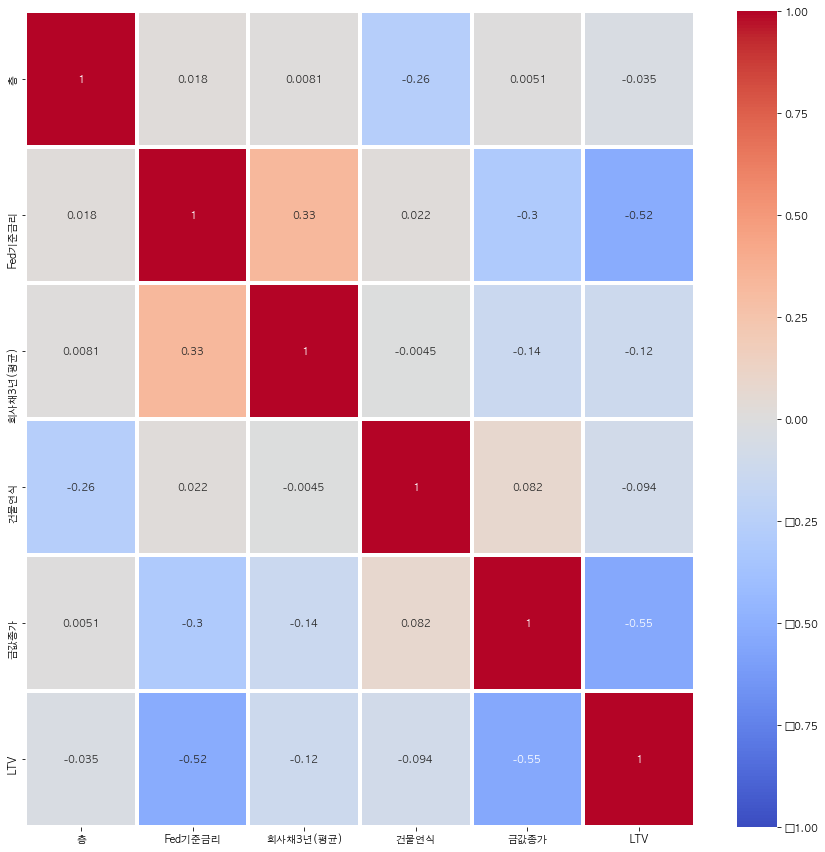

In [39]:
plot_cor(X_scaled)

# LinearRegression

## CV - R2, MSE

In [40]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [41]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.17971,           Validation Score_r2 = 0.00341
      Train Score_mse = 0.04531,           Validation Score_mse = 0.04629


Fold 2: Train Score_r2 = 0.20951,           Validation Score_r2 = -0.06077
      Train Score_mse = 0.04469,           Validation Score_mse = 0.04958


Fold 3: Train Score_r2 = 0.21387,           Validation Score_r2 = -0.00027
      Train Score_mse = 0.0446,           Validation Score_mse = 0.04947


Fold 4: Train Score_r2 = 0.20636,           Validation Score_r2 = 0.01388
      Train Score_mse = 0.04222,           Validation Score_mse = 0.05837


Fold 5: Train Score_r2 = 0.09479,           Validation Score_r2 = -0.11417
      Train Score_mse = 0.04846,           Validation Score_mse = 0.05641


CV 평균 R2 : -0.0316
CV 평균 MSE : 0.052


## 평가지표 train and test 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


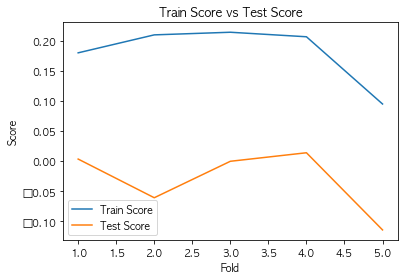

In [42]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

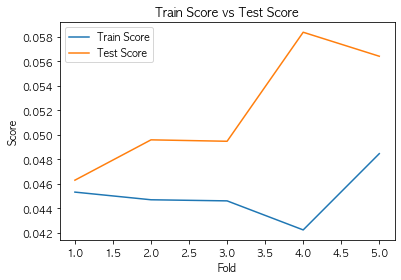

In [43]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정

- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 세 번째로 확정

In [48]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.051, RMSE :  0.226, MAE: 0.226
Variance score :  0.181




In [49]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][3].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
층,0.348300
건물연식,0.118047
회사채3년(평균),0.021705
금값종가,-0.240506
Fed기준금리,-0.249964
LTV,-0.393974


# Ridge & Lasso

## Ridge

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


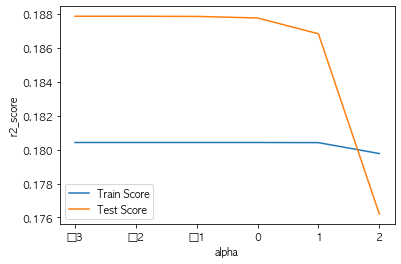

In [50]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

## CV

In [51]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.17971,           Validation Score_r2 = 0.00353
      Train Score_mse = 0.04531,           Validation Score_mse = 0.04628


Fold 2: Train Score_r2 = 0.20951,           Validation Score_r2 = -0.06063
      Train Score_mse = 0.04469,           Validation Score_mse = 0.04958


Fold 3: Train Score_r2 = 0.21387,           Validation Score_r2 = -0.00025
      Train Score_mse = 0.0446,           Validation Score_mse = 0.04947


Fold 4: Train Score_r2 = 0.20636,           Validation Score_r2 = 0.01398
      Train Score_mse = 0.04222,           Validation Score_mse = 0.05837


Fold 5: Train Score_r2 = 0.09479,           Validation Score_r2 = -0.11395
      Train Score_mse = 0.04846,           Validation Score_mse = 0.0564


CV 평균 R2 : -0.0315
CV 평균 MSE : 0.052


## 평가지표 train and test 차이 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


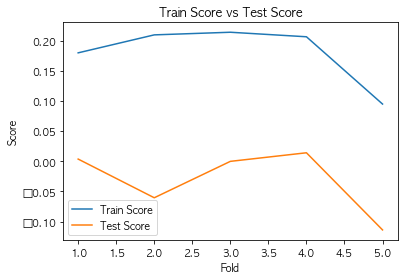

In [52]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [53]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.1804211670732091
0.18777037597514257


In [54]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.051, RMSE :  0.225, MAE: 0.225
Variance score :  0.188




In [55]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.051, RMSE :  0.226, MAE: 0.226
Variance score :  0.181




In [56]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][3].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
층,0.347822
건물연식,0.117937
회사채3년(평균),0.021665
금값종가,-0.239677
Fed기준금리,-0.249446
LTV,-0.393510


In [57]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-1.0716898168624596


In [58]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True])

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [90]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

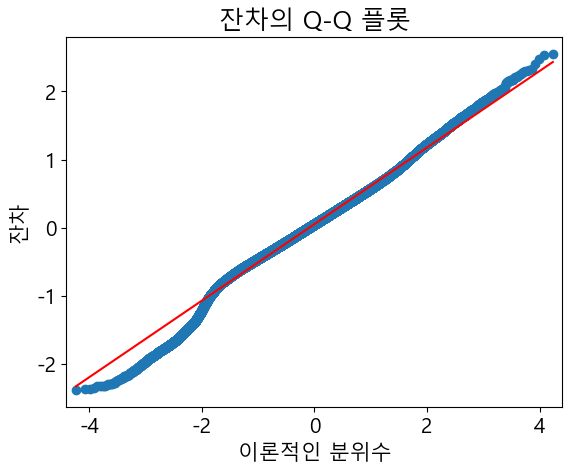

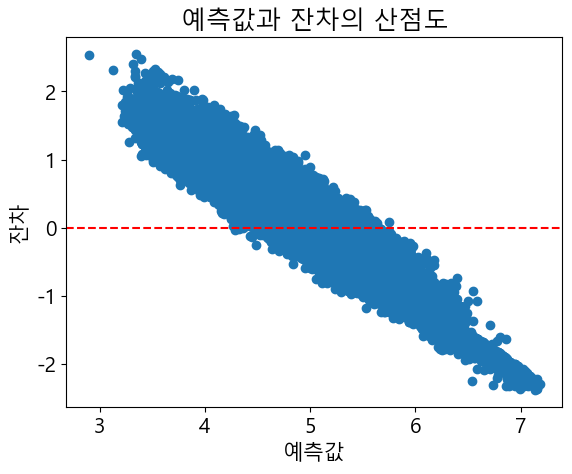

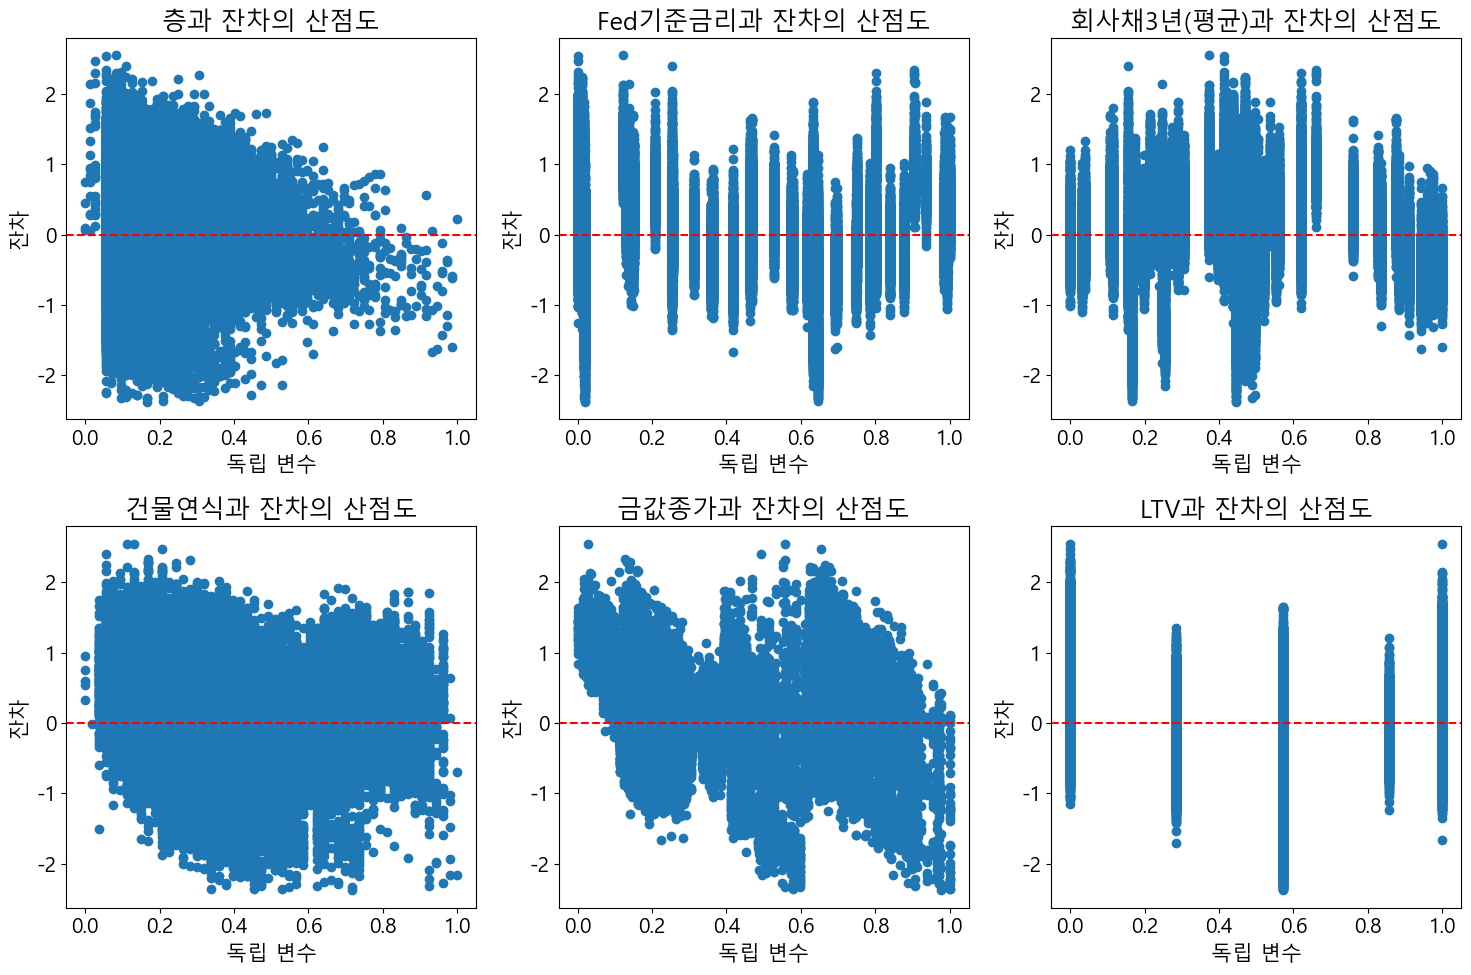

In [91]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()